**Coefficient of determination:** También conocido como R cuadrada, nos permite saber que tan bueno es nuestro modelo de regresión en relación a su desempeño, es la forma mas usada para evaluar el modelo, mide la varianza en la respuesta de la variable y la cual puede predecirse usando la variable x, más info en:
https://thecleverprogrammer.com/2021/06/22/r2-score-in-machine-learning/#:~:text=The%20R2%20score%20is%20a,predictions%20explained%20by%20the%20dataset.

Encontre que es usado en modelos de regresión como:
Linear Regression

*   Ridge Regression
*   Neural Network Regression
*   Lasso Regression
*   Decision Tree Regression
*   Support Vector Machines (SVM)
*   Gausian Regression
*   Polynomial Regression
*   Random Forest
*   KNN Model 

Los valores que acepta el **Coeficiente de determinación (R2)** usualmente estàn comprendidos entre 0 y 1 siendo 1 la mejor calificación posible,sinembargo dentro de la documentación de Sklearn se establece que se pueden obtener resultados negativos, haciendo referencia a que el modelo podría ser arbitrariamente peor. Cabe resaltar que existe mas de una manera de obtener el Coeficiente de determinación, es por esto que matemáticamente la afirmación anterior sobre la posibilidad de valores negativos es verdadera.                                                     
**Caso de valores negativos:**                                           
Puede ser un caso de sobreajuste en el modelo. Puede ocurrir por varias razones, como un conjunto de datos pequeño y ruido en el conjunto de datos.                                                                      
**Caso de cero:**                                                         
Implica que el modelo lineal no es mejor que el modelo que utiliza la media, es decir, una confirmación de que efectivamente no es apropiado.
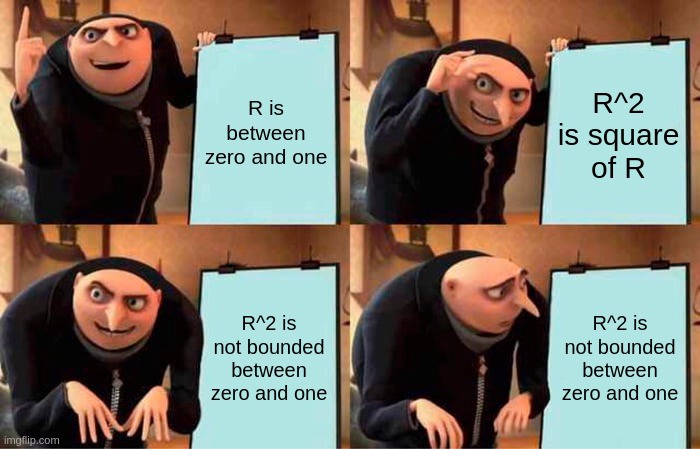

 






  

**Hallar el R cuadrado a nuestros datos de resistencia obtenidos a partir de una hipótesis lineal de 2 parámetros** 

El costo es:  0.15443957493929547
(0.039999999999785985, 0.15884199999999998)
El Valor de R cuadrado es: 0.9677532572260944


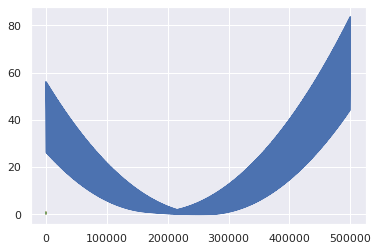

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

car=np.array([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6])# Voltaje
et=np.array([0.169610272,0.283395813,0.386358738,0.470227872,0.433281294,0.600267648,0.73833898,0.79031502,0.877464268,0.843564462,0.964438917])# Corriente
par=np.array([0.1,0.00021])#Me los invento inicialmente los primeros a probar

def Costo(car,et,par):
  n=len(car)
  J=(1/(2*n))*np.sum(np.power( (par[0]+par[1]*car)-et ,2))
  return J

costo=Costo(car,et,par)
print("El costo es: ", costo)

parametros=[]
costos=[]
for o0 in np.arange(-10,10, (10-(-10))/500 ):#con este iteramos Theta 0 para nuestro problema esperamos este cercano a cero
  for o1 in np.arange(1/1000,1, ((1)-(1/1000))/(1000)  ):#con este iteramos Theta 1
    par=(o0,o1)
    J=Costo(car,et,par)
    costos.append(J)
    parametros.append(par)

plt.plot(costos)
minpar=parametros[np.argmin(costos)]
print(minpar)

plt.plot(car,et)
plt.plot(car,minpar[0]+minpar[1]*car)

from sklearn.metrics import r2_score
y_pred=minpar[0]+minpar[1]*car
y_true=et
print("El Valor de R cuadrado es:",r2_score(y_true, y_pred))


**Paquete de visualización SeaBorn y formas y gráficos para modelos de regresión**                                                           
https://seaborn.pydata.org/tutorial/regression.html                    
Ejemplo:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


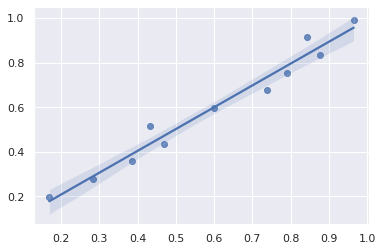

In [ ]:
import seaborn as sns
sns.set_theme(color_codes=True)
sns.regplot(et, minpar[0]+minpar[1]*car);



Realizar por lo menos 3 regresiones para los datos de vacunación de Colombia. X son los dias desde la primera vacuna y Y el número de vacunas puestas ese día.

Regresión lineal datos COVID Argentina

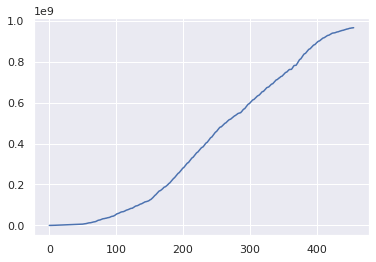

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
df=pd.read_csv("/content/INTENTO.csv", sep=';',header=0)
reg = linear_model.LinearRegression()
arr=df.values
plt.plot(arr[:,0],arr[:,1])
sns.set_theme(color_codes=True)
#sns.regplot(arr[:,0],arr[:,1]);


In [ ]:
Xb=np.array(df)
Xc=Xb[:, [0]]
Xa=np.ones((Xc.shape))
X=np.concatenate((Xa,Xc),axis=1)
Y=arr[:,1]
Y=np.array([Y]).T
#X=np.asmatrix(X)
#np.asarray(Y)
#np.asarray(X)
print(type(X))
print(type(Y))
print(len(X))
print(len(Y))
print(X.shape)
print(Y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
397
397
(397, 2)
(397, 1)


[[-86515479.07560468]
 [  1675159.50007652]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


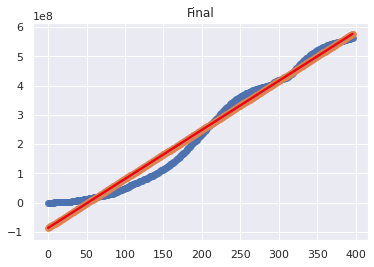

0.9747128216314738

In [ ]:
Theta=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot((X.T),Y))
print(Theta)
sns.set_theme(color_codes=True)
sns.regplot(Xc,Y, 'bo');
#plt.plot(Xc,Y, 'bo')
#plt.plot(Xc,Theta[0,0]+Theta[1,0]*Xc)
sns.regplot(Xc,Theta[0,0]+Theta[1,0]*Xc,line_kws={"color": "red"});
plt.title("Final")
plt.show()
r2_score(Y,Theta[0,0]+Theta[1,0]*Xc)



Otra forma

In [ ]:
 reg = LinearRegression().fit(X, Y)
 print(reg.score(X, Y))
 print(reg.coef_)
 reg.intercept_



0.9734403722769076
[[      0.        2516231.0941324]]


array([-1.62816449e+08])

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y,reg.predict(X))

0.9734403722769076

Cambiando de hipotesis a polinomica cuadrada

In [ ]:
X2=np.power(Xc,2)
X=np.concatenate((Xa,Xc,np.power(Xc,2)),axis=1)
X

array([[1.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.00000e+00, 1.00000e+00, 1.00000e+00],
       [1.00000e+00, 2.00000e+00, 4.00000e+00],
       ...,
       [1.00000e+00, 4.53000e+02, 2.05209e+05],
       [1.00000e+00, 4.54000e+02, 2.06116e+05],
       [1.00000e+00, 4.55000e+02, 2.07025e+05]])

In [ ]:
t1,t2,t3 = np.linalg.lstsq(X, Y, rcond=None)[0]
print("tetha1",t1," , Tetha2",t2, " ,Tetha3",t3)
Ynew=t1+np.dot(Xc,t2)+np.dot(X2,t3)
r2_score(Y,Ynew)

tetha1 [-74764650.65555425]  , Tetha2 [1352550.93744466]  ,Tetha3 [2557.53880591]


0.9873810163917238

Otra forma

In [ ]:
# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression 
# para generar características polinómicas
from sklearn.preprocessing import PolynomialFeatures 
pf = PolynomialFeatures(degree = 2)    # usaremos polinomios de grado 2


In [ ]:

regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
# instruimos a la regresión lineal que aprenda de los datos (ahora polinómicos) (X,y)
regresion_lineal.fit(X, Y) 
# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))
# resultado: w = [0 -4.54 4.95 0.1], b = -57.52

w = [[      0.         1352550.9374448     2557.53880591]], b = [-74764650.65559024]


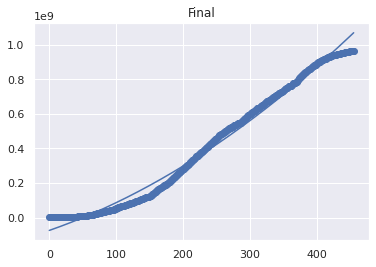

In [ ]:
plt.plot(Xc,Y, 'bo')
plt.plot(Xc,t1+np.dot(Xc,t2)+np.dot(X2,t3))
plt.title("Final")
plt.show()

Cambiando de hipotesis a polinómica al cubo

In [ ]:
X3=np.power(Xc,3)
X=np.concatenate((Xa,Xc,np.power(Xc,2),np.power(Xc,3)),axis=1)
X

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 2.0000000e+00, 4.0000000e+00, 8.0000000e+00],
       ...,
       [1.0000000e+00, 4.5300000e+02, 2.0520900e+05, 9.2959677e+07],
       [1.0000000e+00, 4.5400000e+02, 2.0611600e+05, 9.3576664e+07],
       [1.0000000e+00, 4.5500000e+02, 2.0702500e+05, 9.4196375e+07]])

In [ ]:
pf = PolynomialFeatures(degree = 3)    # usaremos polinomios de grado 3
regresion_lineal.fit(X, Y)
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))
Yn=-19052938.59991157+np.dot(Xc,-1.13542427e+06)+np.dot(X2,1.62427489e+04)+np.dot(X3,-2.00515899e+01)
r2_score(Y,Yn)


w = [[ 0.00000000e+00 -1.13542427e+06  1.62427489e+04 -2.00515899e+01]], b = [19052938.59991157]


0.9859512695945036

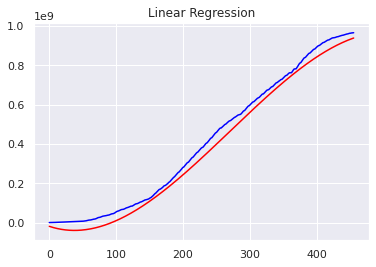

In [ ]:
lin = LinearRegression().fit(X,Y)
plt.plot(Xc, Y, color = 'blue')
plt.plot(Xc,-19052938.59991157+np.dot(Xc,-1.13542427e+06)+np.dot(X2,1.62427489e+04)+np.dot(X3,-2.00515899e+01), color = 'red')
plt.title('Linear Regression')

  
plt.show()
  






Este grafico me indica que ya estoy causando un overfit a mi parecer

AHORA CON EL DATASET DE CANADA

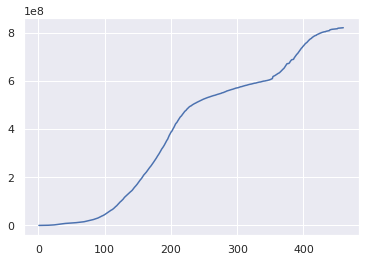

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
df=pd.read_csv("/content/CANADAS.csv", sep=';',header=0)
reg = linear_model.LinearRegression()
arr=df.values
plt.plot(arr[:,0],arr[:,1])

In [ ]:
Xb=np.array(df)
Xc=Xb[:, [0]]
Xa=np.ones((Xc.shape))
X=np.concatenate((Xa,Xc),axis=1)
Y=arr[:,1]
Y=np.array([Y]).T
#X=np.asmatrix(X)
#np.asarray(Y)
#np.asarray(X)
print(type(X))
print(type(Y))
print(len(X))
print(len(Y))
print(X.shape)
print(Y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
460
460
(460, 2)
(460, 1)


[[-87143243.14606404]
 [  2097223.31667631]]


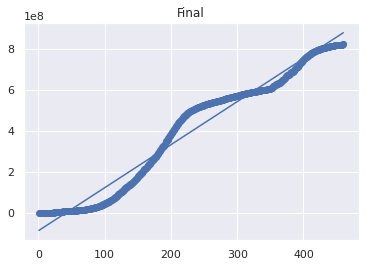

0.9658147005229971

In [ ]:
Theta=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot((X.T),Y))
print(Theta)
plt.plot(Xc,Y, 'bo')
plt.plot(Xc,Theta[0,0]+Theta[1,0]*Xc)
plt.title("Final")
plt.show()
r2_score(Y,Theta[0,0]+Theta[1,0]*Xc)


Polinomica cuadrada

In [ ]:
X2=np.power(Xc,2)
X=np.concatenate((Xa,Xc,np.power(Xc,2)),axis=1)
X

array([[1.00000e+00, 1.00000e+00, 1.00000e+00],
       [1.00000e+00, 2.00000e+00, 4.00000e+00],
       [1.00000e+00, 3.00000e+00, 9.00000e+00],
       ...,
       [1.00000e+00, 4.58000e+02, 2.09764e+05],
       [1.00000e+00, 4.59000e+02, 2.10681e+05],
       [1.00000e+00, 4.60000e+02, 2.11600e+05]])

In [ ]:
from sklearn.metrics import r2_score
t1,t2,t3 = np.linalg.lstsq(X, Y, rcond=None)[0]
print("tetha1",t1," , Tetha2",t2, " ,Tetha3",t3)
Ynew=t1+np.dot(Xc,t2)+np.dot(X2,t3)
r2_score(Y,Ynew)

tetha1 [-1.15874887e+08]  , Tetha2 [2470361.55217766]  ,Tetha3 [-809.41048916]


0.9678440568375123

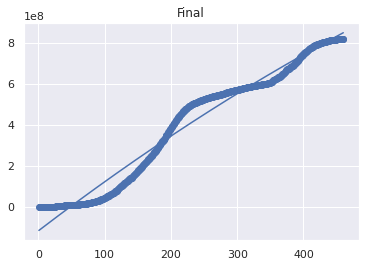

In [ ]:
plt.plot(Xc,Y, 'bo')
plt.plot(Xc,t1+np.dot(Xc,t2)+np.dot(X2,t3))
plt.title("Final")
plt.show()

Polinomica al cubo

In [ ]:
X3=np.power(Xc,3)
X=np.concatenate((Xa,Xc,np.power(Xc,2),np.power(Xc,3)),axis=1)
X

array([[1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 2.0000000e+00, 4.0000000e+00, 8.0000000e+00],
       [1.0000000e+00, 3.0000000e+00, 9.0000000e+00, 2.7000000e+01],
       ...,
       [1.0000000e+00, 4.5800000e+02, 2.0976400e+05, 9.6071912e+07],
       [1.0000000e+00, 4.5900000e+02, 2.1068100e+05, 9.6702579e+07],
       [1.0000000e+00, 4.6000000e+02, 2.1160000e+05, 9.7336000e+07]])

In [ ]:
pf = PolynomialFeatures(degree = 3) 
regresion_lineal = LinearRegression()   # usaremos polinomios de grado 3
regresion_lineal.fit(X, Y)
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))
Yn=regresion_lineal.intercept_+np.dot(Xc,regresion_lineal.coef_[0,1])+np.dot(X2,regresion_lineal.coef_[0,2])+np.dot(X3,regresion_lineal.coef_[0,3])
r2_score(Y,Yn)


w = [[ 0.00000000e+00  7.13438341e+05  8.70803511e+03 -1.37634788e+01]], b = [-48013596.64718968]


0.9758256346751307

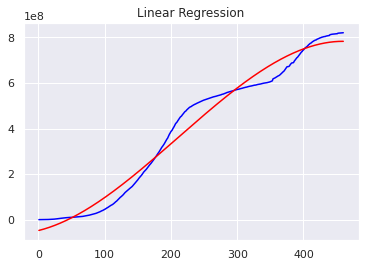

In [ ]:
lin = LinearRegression().fit(X,Y)
plt.plot(Xc, Y, color = 'blue')
plt.plot(Xc,Yn, color = 'red')
plt.title('Linear Regression')

  
plt.show()

DATASET DE AUSTRALIA

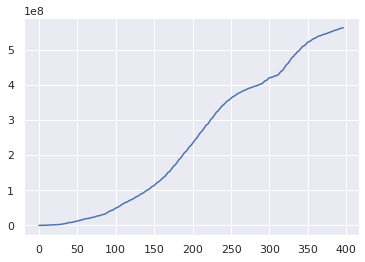

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
df=pd.read_csv("/content/AUSTRALIA.csv", sep=';',header=0)
reg = linear_model.LinearRegression()
arr=df.values
plt.plot(arr[:,0],arr[:,1])


In [ ]:
Xb=np.array(df)
Xc=Xb[:, [0]]
Xa=np.ones((Xc.shape))
X=np.concatenate((Xa,Xc),axis=1)
Y=arr[:,1]
Y=np.array([Y]).T
#X=np.asmatrix(X)
#np.asarray(Y)
#np.asarray(X)
print(type(X))
print(type(Y))
print(len(X))
print(len(Y))
print(X.shape)
print(Y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
397
397
(397, 2)
(397, 1)


[[-86515479.07560468]
 [  1675159.50007652]]


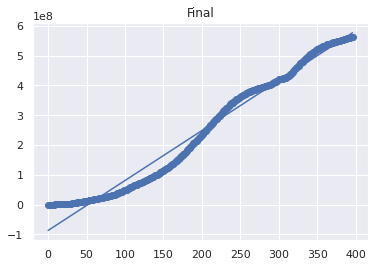

0.9747128216314738

In [ ]:
Theta=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot((X.T),Y))
print(Theta)
plt.plot(Xc,Y, 'bo')
plt.plot(Xc,Theta[0,0]+Theta[1,0]*Xc)
plt.title("Final")
plt.show()
r2_score(Y,Theta[0,0]+Theta[1,0]*Xc)

Polinomica cuadrada

In [ ]:
X2=np.power(Xc,2)
X=np.concatenate((Xa,Xc,np.power(Xc,2)),axis=1)
X

array([[1.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.00000e+00, 1.00000e+00, 1.00000e+00],
       [1.00000e+00, 2.00000e+00, 4.00000e+00],
       ...,
       [1.00000e+00, 3.94000e+02, 1.55236e+05],
       [1.00000e+00, 3.95000e+02, 1.56025e+05],
       [1.00000e+00, 3.96000e+02, 1.56816e+05]])

In [ ]:
from sklearn.metrics import r2_score
t1,t2,t3 = np.linalg.lstsq(X, Y, rcond=None)[0]
print("tetha1",t1," , Tetha2",t2, " ,Tetha3",t3)
Ynew=t1+np.dot(Xc,t2)+np.dot(X2,t3)
r2_score(Y,Ynew)

tetha1 [-48529875.74525419]  , Tetha2 [1098162.99379273]  ,Tetha3 [1457.06188455]


0.9824609904937777

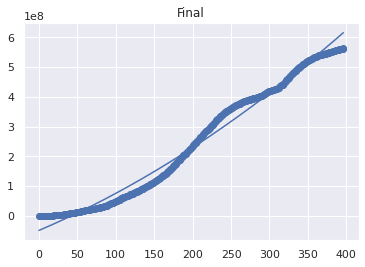

In [ ]:
plt.plot(Xc,Y, 'bo')
plt.plot(Xc,t1+np.dot(Xc,t2)+np.dot(X2,t3))
plt.title("Final")
plt.show()

Polinomica al cubo

In [ ]:
X3=np.power(Xc,3)
X=np.concatenate((Xa,Xc,np.power(Xc,2),np.power(Xc,3)),axis=1)
X

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 2.0000000e+00, 4.0000000e+00, 8.0000000e+00],
       ...,
       [1.0000000e+00, 3.9400000e+02, 1.5523600e+05, 6.1162984e+07],
       [1.0000000e+00, 3.9500000e+02, 1.5602500e+05, 6.1629875e+07],
       [1.0000000e+00, 3.9600000e+02, 1.5681600e+05, 6.2099136e+07]])

In [ ]:
pf = PolynomialFeatures(degree = 3) 
regresion_lineal = LinearRegression()   # usaremos polinomios de grado 3
regresion_lineal.fit(X, Y)
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))
Yn=regresion_lineal.intercept_+np.dot(Xc,regresion_lineal.coef_[0,1])+np.dot(X2,regresion_lineal.coef_[0,2])+np.dot(X3,regresion_lineal.coef_[0,3])
r2_score(Y,Yn)

w = [[ 0.00000000e+00 -6.99127343e+05  1.28179121e+04 -1.91260105e+01]], b = [10406428.46750402]


0.9959867776988394

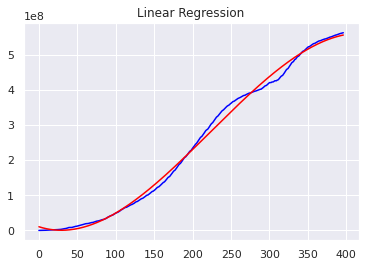

In [ ]:
lin = LinearRegression().fit(X,Y)
plt.plot(Xc, Y, color = 'blue')
plt.plot(Xc,Yn, color = 'red')
plt.title('Linear Regression')

  
plt.show()

Conclusiones:

Este taller me permitió conocer muchas funciones y sus usos dentro de la libreria numpy y sklearn, a parte de el uso del paquete de visualización de seaborn.
En relación con la aplicación de los modelos de regresion lineal , ya sea polinómica cuadrada o al cubo permitieron realmente aprender su implementación y análisis en estos diferentes datasets, siento que despues de la realización de este taller tengo mucho más claros los temas vistos en clase y sus posibles aplicaciones.